In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colour Generator Model/colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [3]:
data.shape

(14157, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14157 entries, 0 to 14156
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    14157 non-null  object
 1   red     14157 non-null  int64 
 2   green   14157 non-null  int64 
 3   blue    14157 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 442.5+ KB


In [5]:
names = data["name"]

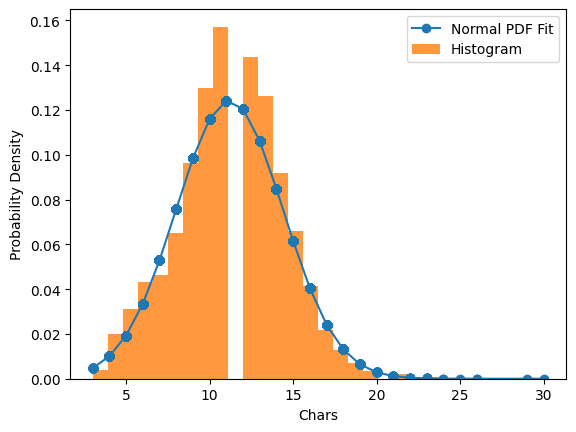

In [6]:
h = sorted(names.str.len().to_numpy())

import scipy.stats as stats
import matplotlib.pyplot as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h, fit, '-o', label="Normal PDF Fit")
plt.hist(h, density=True, bins=30, alpha=0.8, label="Histogram")

plt.xlabel('Chars')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [7]:
np.array(h).max()

30

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = pad_sequences(tokenized, maxlen=maxlen, padding='post', truncating='post')

print("Tokenized Sequences:", tokenized)
print("Padded Sequences:", padded_names)

Tokenized Sequences: [[15, 2, 3, 2, 21, 1, 1, 9], [10, 2, 13, 13, 7, 1, 4, 18, 3, 8, 20, 6], [11, 12, 11, 12, 17, 18, 1, 3, 4, 11, 3, 12, 10, 16], [15, 8, 8, 7, 4, 18, 7, 12, 1], [13, 5, 10, 9, 2, 6, 11, 1], [7, 5, 14, 16, 9, 4, 12, 3, 15, 7, 1], [1, 2, 10, 9, 4, 10, 5, 13, 1], [22, 7, 8, 3, 5, 13, 2, 4, 10, 1, 2, 10, 16, 1, 7, 7, 10], [15, 2, 3, 5, 10], [15, 8, 20, 13, 1, 3, 4, 18, 7, 12, 10, 16], [17, 5, 13, 13, 7, 1, 4, 18, 7, 12, 1], [9, 12, 3, 9, 7, 1, 4, 14, 3, 1, 1, 6], [3, 1, 7, 2, 27, 5, 6, 14, 4, 18, 7, 12, 1], [20, 2, 10, 2, 18, 5, 4, 15, 8, 20, 13, 1, 3], [3, 8, 10, 1, 17, 2, 3, 19, 4, 10, 15, 3, 5, 14], [7, 5, 14, 16, 9, 4, 17, 2, 12, 23, 1], [2, 5, 3, 18, 3, 12, 10, 16, 1, 13, 4, 11, 8, 15, 15, 1, 3], [10, 6, 8, 20, 4, 22, 7, 12, 3, 3, 19], [2, 12, 3, 8, 3, 2, 4, 18, 3, 8, 20, 6], [14, 8, 7, 13, 4, 18, 12, 22, 22], [2, 6, 9, 5, 25, 12, 2, 3, 5, 2, 6, 4, 18, 3, 8, 20, 6], [10, 8, 15, 16, 5, 10, 9, 5, 11, 2, 9, 1, 13, 4, 7, 5, 7, 2, 11], [10, 20, 1, 1, 9, 4, 15, 1, 2, 11, 1

In [12]:
from tensorflow.keras.utils import to_categorical

num_classes = np.max(padded_names) + 1
one_hot_names = to_categorical(padded_names, num_classes=num_classes)

print("One-Hot Encoded Shape:", one_hot_names.shape)
print("Number of Classes:", num_classes)

One-Hot Encoded Shape: (14157, 25, 28)
Number of Classes: 28


In [14]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [15]:
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])

In [16]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.5794 - loss: 0.0649 - val_acc: 0.5968 - val_loss: 0.0622
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.6099 - loss: 0.0601 - val_acc: 0.6434 - val_loss: 0.0601
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.6489 - loss: 0.0566 - val_acc: 0.6801 - val_loss: 0.0573
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.6517 - loss: 0.0548 - val_acc: 0.6497 - val_loss: 0.0566
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.6669 - loss: 0.0523 - val_acc: 0.6794 - val_loss: 0.0539
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.6742 - loss: 0.0503 - val_acc: 0.6949 - val_loss: 0.0530
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.6825 - loss: 0.0488 - val_acc: 0.6949 - val_loss: 0.0518
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.6786 - loss: 0.0478 - val_acc: 0.6773 - val_loss: 0.0518
Epoch 9/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - a

In [20]:
model.save_weights('model_1.weights.h5')

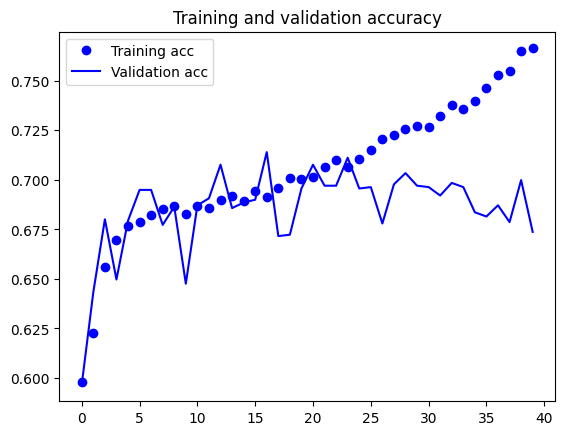

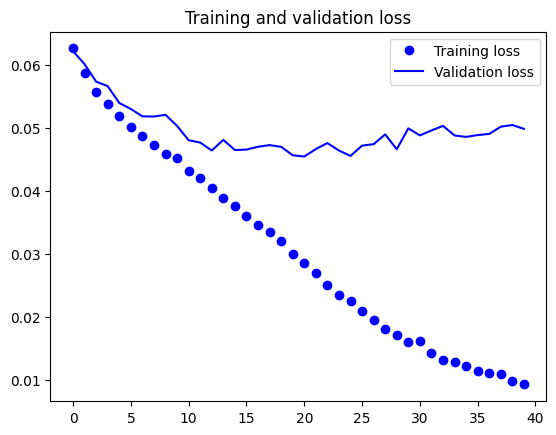

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [23]:
def scale(n):
    return int(n * 255)

In [24]:
def predict(name):
    name = name.lower()

    tokenized = t.texts_to_sequences([name])
    padded = pad_sequences(tokenized, maxlen=maxlen, padding='post', truncating='post')

    one_hot = to_categorical(padded, num_classes=num_classes)

    one_hot = one_hot.reshape(1, *one_hot.shape[1:])

    pred = model.predict(one_hot)[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(f"{name}, R, G, B: {r}, {g}, {b}")
    plot_rgb([r, g, b])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
turquoise, R, G, B: 32, 173, 191


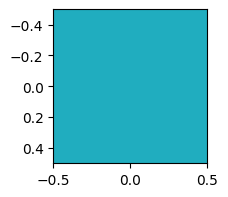

In [25]:
predict('turquoise')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
gamboge, R, G, B: 227, 160, 51


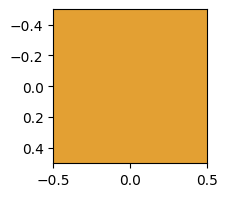

In [26]:
predict('gamboge')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
tyrian purple, R, G, B: 63, 17, 89


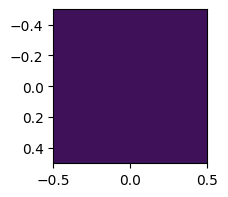

In [28]:
predict('tyrian purple')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
sangria, R, G, B: 165, 41, 48


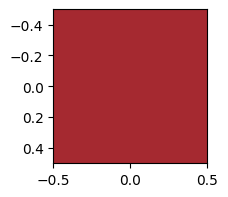

In [29]:
predict('sangria')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
ivory, R, G, B: 237, 238, 226


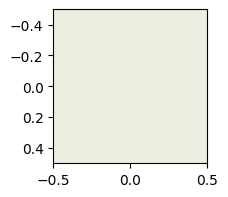

In [30]:
predict('ivory')